In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud 


In [2]:
URL = 'https://github.com/shlokashah/'
page = requests.get(URL)

In [3]:
page

<Response [200]>

In [4]:
soup = BeautifulSoup(page.content, 'html.parser')


In [5]:
# soup

In [6]:
temp = soup.find('div',class_="p-note user-profile-bio mb-3 js-user-profile-bio f4")

In [7]:
temp = temp.find('div')
print(temp)

<div>Final Year Computer Science Student at Sardar Patel Institute Of Technology</div>


In [8]:
profile_bio = temp.text
profile_bio

'Final Year Computer Science Student at Sardar Patel Institute Of Technology'

In [9]:
temp = soup.find_all(class_="link-gray no-underline no-wrap")
# temp

In [10]:
flag = []
for t in temp:
    f = t.find(class_='text-bold text-gray-dark')
    flag.append(f.text)

In [11]:
flag

['11', '11', '30']

In [12]:
followers = flag[0]
following = flag[1]
starred_repo_by_user = flag[2]

In [13]:
temp = soup.find(class_='vcard-detail pt-1 css-truncate css-truncate-target hide-sm hide-md')
temp

<li aria-label="Home location: Mumbai" class="vcard-detail pt-1 css-truncate css-truncate-target hide-sm hide-md" itemprop="homeLocation" show_title="false"><svg aria-hidden="true" class="octicon octicon-location" height="16" version="1.1" viewbox="0 0 16 16" width="16"><path d="M11.536 3.464a5 5 0 010 7.072L8 14.07l-3.536-3.535a5 5 0 117.072-7.072v.001zm1.06 8.132a6.5 6.5 0 10-9.192 0l3.535 3.536a1.5 1.5 0 002.122 0l3.535-3.536zM8 9a2 2 0 100-4 2 2 0 000 4z" fill-rule="evenodd"></path></svg>
<span class="p-label">Mumbai</span>
</li>

In [14]:
location = temp.find(class_='p-label').text

In [15]:
location

'Mumbai'

In [16]:
temp = soup.find_all(class_='vcard-detail pt-1 css-truncate css-truncate-target')[1]
temp

<li class="vcard-detail pt-1 css-truncate css-truncate-target" data-test-selector="profile-website-url" itemprop="url"><svg aria-hidden="true" class="octicon octicon-link" height="16" version="1.1" viewbox="0 0 16 16" width="16"><path d="M7.775 3.275a.75.75 0 001.06 1.06l1.25-1.25a2 2 0 112.83 2.83l-2.5 2.5a2 2 0 01-2.83 0 .75.75 0 00-1.06 1.06 3.5 3.5 0 004.95 0l2.5-2.5a3.5 3.5 0 00-4.95-4.95l-1.25 1.25zm-4.69 9.64a2 2 0 010-2.83l2.5-2.5a2 2 0 012.83 0 .75.75 0 001.06-1.06 3.5 3.5 0 00-4.95 0l-2.5 2.5a3.5 3.5 0 004.95 4.95l1.25-1.25a.75.75 0 00-1.06-1.06l-1.25 1.25a2 2 0 01-2.83 0z" fill-rule="evenodd"></path></svg>
<a class="link-gray-dark" href="https://shlokashah.github.io" rel="nofollow me">https://shlokashah.github.io</a>
</li>

In [17]:
website_link = temp.find_all(class_ ='link-gray-dark')[0].text

In [18]:
website_link

'https://shlokashah.github.io'

In [19]:
temp = soup.find_all('a',class_="UnderlineNav-item")[1]

In [20]:
temp

<a class="UnderlineNav-item" data-hydro-click='{"event_type":"user_profile.click","payload":{"profile_user_id":42071210,"target":"TAB_REPOSITORIES","user_id":null,"originating_url":"https://github.com/shlokashah"}}' data-hydro-click-hmac="96911c978de926d46c0db570373fb81ee5284bac727ca7408741a1abf3984cbc" href="/shlokashah?tab=repositories">
<svg aria-hidden="true" class="octicon octicon-repo UnderlineNav-octicon hide-sm" height="16" version="1.1" viewbox="0 0 16 16" width="16"><path d="M2 2.5A2.5 2.5 0 014.5 0h8.75a.75.75 0 01.75.75v12.5a.75.75 0 01-.75.75h-2.5a.75.75 0 110-1.5h1.75v-2h-8a1 1 0 00-.714 1.7.75.75 0 01-1.072 1.05A2.495 2.495 0 012 11.5v-9zm10.5-1V9h-8c-.356 0-.694.074-1 .208V2.5a1 1 0 011-1h8zM5 12.25v3.25a.25.25 0 00.4.2l1.45-1.087a.25.25 0 01.3 0L8.6 15.7a.25.25 0 00.4-.2v-3.25a.25.25 0 00-.25-.25h-3.5a.25.25 0 00-.25.25z" fill-rule="evenodd"></path></svg>
      Repositories
      <span class="Counter" title="26">26</span>
</a>

In [21]:
repository_count = temp.find(class_='Counter').text
repository_count

'26'

In [22]:
temp = soup.find('div',class_="js-yearly-contributions")

In [23]:
total_contributions = temp.find(class_='f4 text-normal mb-2').text.strip()[:3]
total_contributions 

'399'

In [24]:
temp = soup.find(class_='filter-list small')
temp

<ul class="filter-list small">
<li>
<a aria-label="Contribution activity in 2020" class="js-year-link filter-item px-3 mb-2 py-2 selected" data-hydro-click='{"event_type":"user_profile.click","payload":{"profile_user_id":42071210,"target":"CONTRIBUTION_YEAR_LINK","user_id":null,"originating_url":"https://github.com/shlokashah"}}' data-hydro-click-hmac="b16ee3b44a461f67adf39aedf9e9393d9dfc3cd1a0556c6f5bf63e807b9cc363" href="/shlokashah?tab=overview&amp;from=2020-11-01&amp;to=2020-11-02" id="year-link-2020">2020</a>
</li>
<li>
<a aria-label="Contribution activity in 2019" class="js-year-link filter-item px-3 mb-2 py-2" data-hydro-click='{"event_type":"user_profile.click","payload":{"profile_user_id":42071210,"target":"CONTRIBUTION_YEAR_LINK","user_id":null,"originating_url":"https://github.com/shlokashah"}}' data-hydro-click-hmac="b16ee3b44a461f67adf39aedf9e9393d9dfc3cd1a0556c6f5bf63e807b9cc363" href="/shlokashah?tab=overview&amp;from=2019-12-01&amp;to=2019-12-31" id="year-link-2019">201

In [25]:
contribution = []
contribution.append(temp.find(class_='js-year-link filter-item px-3 mb-2 py-2 selected')['href'])
contribution

['/shlokashah?tab=overview&from=2020-11-01&to=2020-11-02']

In [26]:
year = []
# print(temp)
year.append(temp.find_all(class_='js-year-link filter-item px-3 mb-2 py-2'))
contribution.append(year[0][0]['href'])
contribution.append(year[0][1]['href'])
print()
print(contribution)
no_of_years = len(contribution)
print(no_of_years)


['/shlokashah?tab=overview&from=2020-11-01&to=2020-11-02', '/shlokashah?tab=overview&from=2019-12-01&to=2019-12-31', '/shlokashah?tab=overview&from=2018-12-01&to=2018-12-31']
3


In [27]:
current_year = [2020]
flag = current_year[0]-1
for i in range(no_of_years-1):
    current_year.append(flag)   
    flag=flag-1
current_year

[2020, 2019, 2018]

In [28]:
contribution_per_year = []
for i in contribution:
    year_url = 'https://github.com'+i
    page_year = requests.get(year_url)
    soup_year = BeautifulSoup(page_year.content,'html.parser')
    contribution_per_year.append(soup_year.find(class_="f4 text-normal mb-2").text.strip()[:3])
contribution_per_year 

['390', '68 ', '35 ']

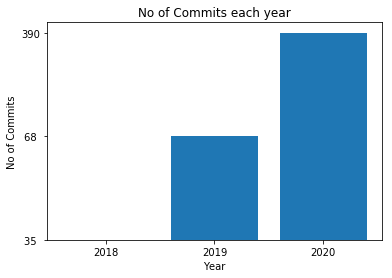

In [29]:
fig = plt.figure()
plt.bar(current_year[::-1],contribution_per_year[::-1])
plt.xlabel("Year")
plt.xticks(current_year[::-1])
plt.ylabel("No of Commits")
plt.title("No of Commits each year")
plt.show()

In [30]:
def monthly_commit(month_year,current_year):
    commit = []
    month = []
    count = 0
#     i = 0
    m = month_year[0]['data-date'][5:7]
    # month.append(m)
    for day in month_year:
        if(day['data-date'][5:7]==m):
            count = count + int(day['data-count'])
        else:
            commit.append(count)
            month.append(m)
    #         print(month)
            count = 0
            m = day['data-date'][5:7]
            count = int(day['data-count'])
    #         month.append(m)
    month.append(m)
    commit.append(count)
    fig = plt.figure()
    plt.bar(month,commit)
    plt.xlabel("Months")
    plt.xticks(month)
#     plt.yticks(commit)
    plt.ylabel("No of Commits")
    plt.title("No of Commits each Month for"+" "+str(current_year))
    plt.show()
#     i = i+1


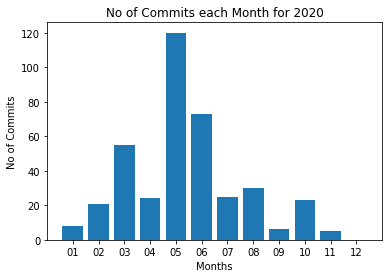

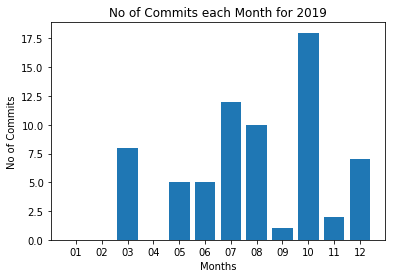

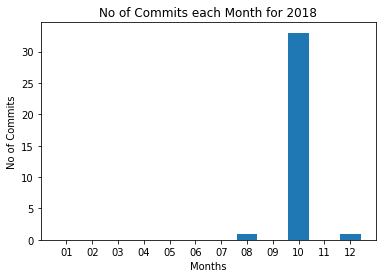

In [31]:
for i in range(len(current_year)):
    year = 'https://github.com'+contribution[i]
    page = requests.get(year)
    soup_year = BeautifulSoup(page.content,'html.parser')
    month = soup_year.find_all(class_='day')
    monthly_commit(month,current_year[i])

In [32]:
data = soup.find(class_='js-activity-overview-graph-container')['data-percentages']
data

'{"Commits":98,"Pull requests":2,"Issues":0,"Code review":0}'

In [33]:
data = data.lstrip('{').rstrip('}').split(',')

In [34]:
commit_percentage = int(data[0][10:])
commit_percentage

98

In [35]:
pull_request = int(data[1][16:])
pull_request

2

In [36]:
issues = int(data[2][9:])
issues

0

In [37]:
code_review = int(data[3][14:])
code_review

0

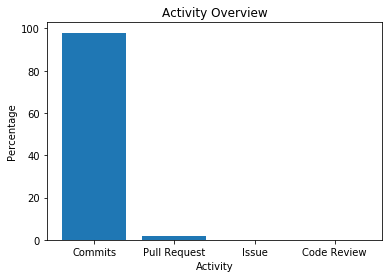

In [38]:
fig = plt.figure()
plt.bar([0,1,2,3],[commit_percentage,pull_request,issues,code_review])
plt.xlabel("Activity")
plt.xticks([0,1,2,3],('Commits','Pull Request','Issue','Code Review'))
plt.ylabel('Percentage')
plt.title("Activity Overview")
plt.show()

In [39]:
repository_url = URL + '?tab=repositories'

In [40]:
repo_page = requests.get(repository_url)

In [41]:
repo_page

<Response [200]>

In [42]:
repo_soup = BeautifulSoup(repo_page.content,'html.parser')

In [43]:
# repo_soup

In [44]:
repo_list = repo_soup.find(id='user-repositories-list')

In [45]:
# repo_list

In [46]:
repo_links = repo_list.find_all(class_='wb-break-all')
# repo_links

In [47]:
repo_link_list = []
for repo in repo_links:
    flag = repo.find('a')['href']
    repo_link_list.append(flag)
# repo_link_list

In [65]:
def word_cloud(value,name):
#     wordcloud = WordCloud().generate_from_frequencies(word_could_dict)
    wc = WordCloud(width = 1000, height = 500,max_font_size=100, min_font_size=30,background_color="black")
    wc.generate_from_frequencies(value)
    plt.imshow(wc, interpolation="bilinear")
#     plt.figure(figsize=(15,8))
    plt.title(name)
    plt.axis("off")
    plt.show()

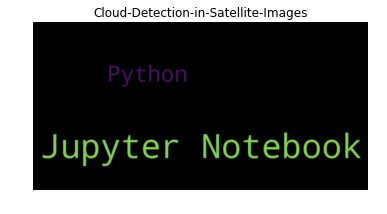

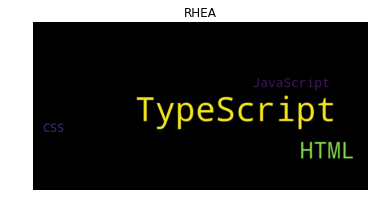

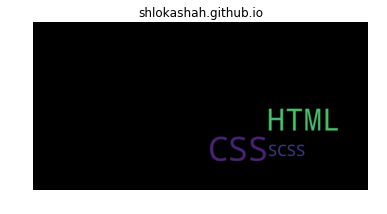

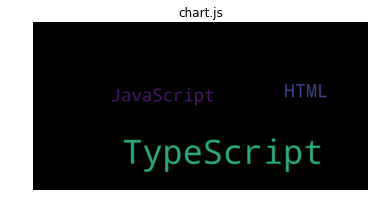

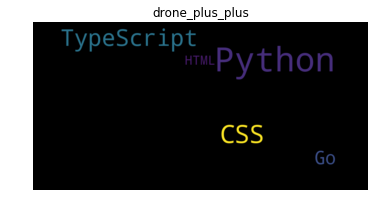

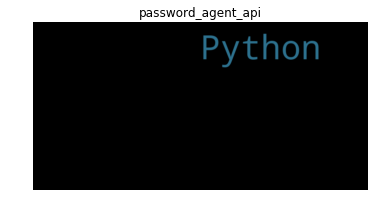

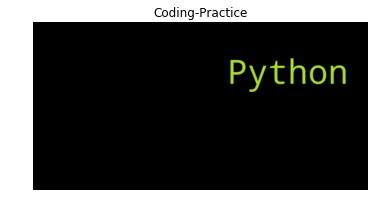

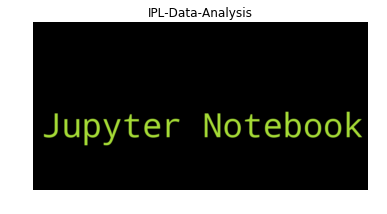

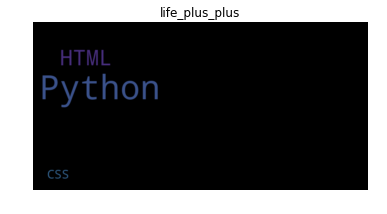

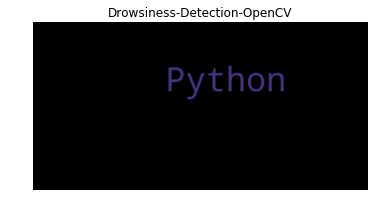

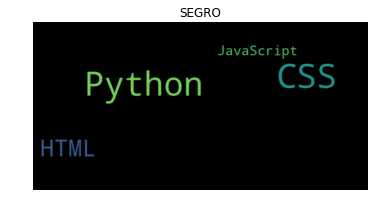

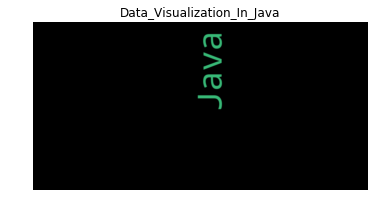

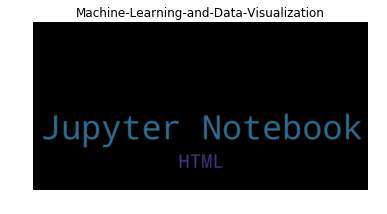

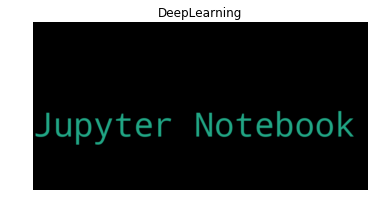

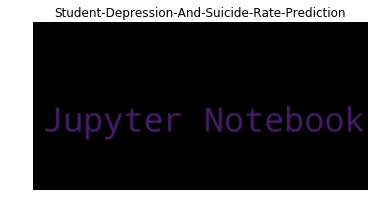

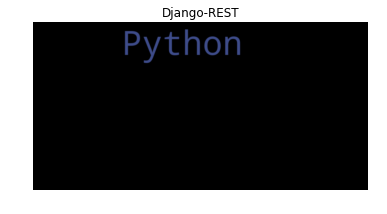

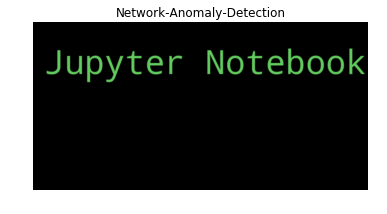

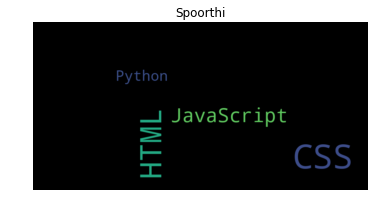

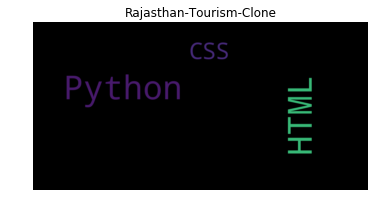

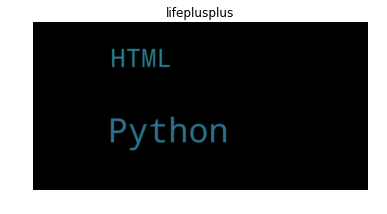

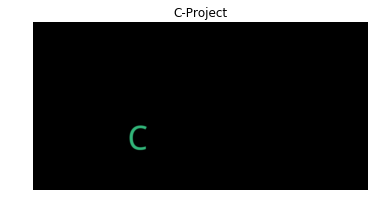

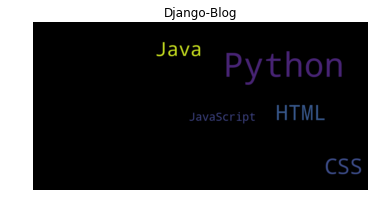

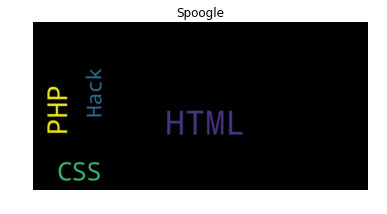

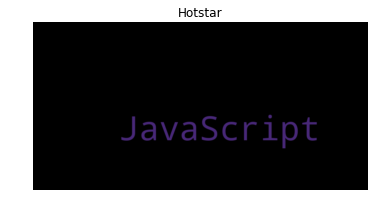

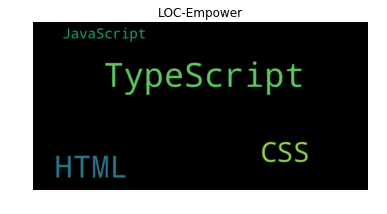

In [66]:
overall_language = {}
topics = []
for repo in repo_link_list:
    repo_name = repo.split('/')[2]
#     print(repo_name)
    link = 'https://github.com'+repo
    temp = requests.get(link)
    temp = BeautifulSoup(temp.content,'html.parser')
    if temp.find(class_='topic-tag topic-tag-link'):
        flag = temp.find_all(class_='topic-tag topic-tag-link')
        topics.append(flag)
    lang = temp.find_all(class_='d-inline-flex flex-items-center flex-nowrap link-gray no-underline text-small mr-3')
    repo_lang_dict = {}
    for i in lang:
        language = i.find(class_='text-gray-dark text-bold mr-1').text
#         print(language)
        percentage = float(i.find_all('span')[1].text.rstrip('%'))
#         print(percentage)
        if language not in repo_lang_dict:
            repo_lang_dict[language] = percentage
        else:
            repo_lang_dict[language] = repo_lang_dict[language] + percentage
        if language not in overall_language:
            overall_language[language] = percentage
        else:
            overall_language[language] = overall_language[language] + percentage
#     print(repo_lang_dict)
    if repo_lang_dict:
        word_cloud(repo_lang_dict,repo_name)
    
    
    


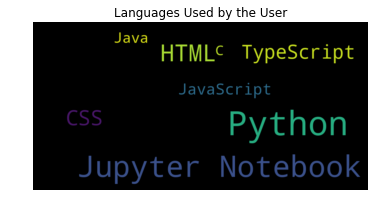

In [67]:
word_cloud(overall_language,'Languages Used by the User')

In [68]:
# print(topics)
all_topics = []
for i in topics:
    for j in i:
        all_topics.append(j.text.strip().rstrip('\n')) 
# all_topics
    

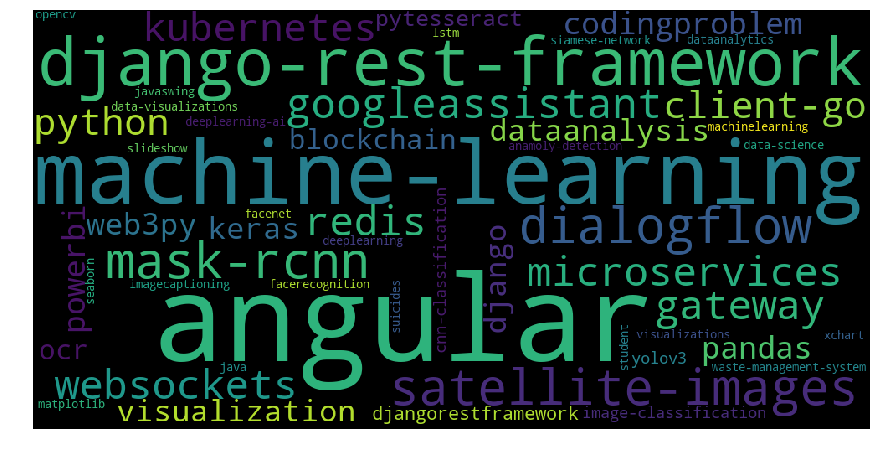

In [69]:
from collections import Counter
word_could_dict=Counter(all_topics)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

In [52]:
### Top 8 languages

In [55]:
percentage = []
language = []
for i,v in enumerate(overall_language):
#     print(i,v)
    language.append(v)
    overall_language[v] = overall_language[v]/10
    percentage.append(overall_language[v])
# overall_language

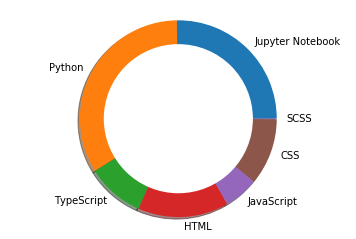

In [56]:
labels = language[:7]
sizes = percentage[:7]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# explode = (0) * len(language)
plt.pie(sizes,labels=labels,shadow=True,radius=1.0)
# plt.rcParams["figure.figsize"] = (4, 8)
centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()  

In [57]:
temp = repo